# Project Titanic Dataset

**object**

* Understand the Dataset & cleanup (if required) 

* Build a strong classification model to predict whether the passenger survives or not 

* Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms 


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set()
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.shape

(891, 12)

# prepare

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# visualization

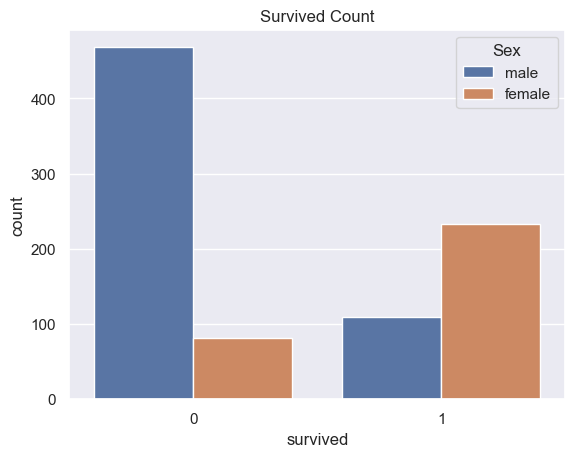

In [9]:
plt.figsize=(8, 6)
sns.countplot(x='Survived', data=data, hue='Sex')
plt.xlabel('survived')
plt.ylabel('count')
plt.title('Survived Count')
plt.show()

In [10]:
selected_features = ['Pclass', 'Sex', 'Age', 'Fare']

**Encoding categorical variable**

In [11]:
data['Sex'] = data['Sex'].map({'male':0, 'female': 1})

**Handling missing Value (e.g, filling missing age value with the median**

In [12]:
data['Age'].fillna(data['Age'].median(), inplace=True)

split the data into feature and target variable

In [13]:
X = data[selected_features]
y = data['Survived']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [15]:
stand = StandardScaler()
X_train_stand = stand.fit_transform(X_train)
X_test_stand = stand.fit_transform(X_test)

In [16]:
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_test, y_pred)

0.8044692737430168

In [17]:
survived_count = y_pred[y_pred == 1].shape[0]
not_survived_count = y_pred[y_pred == 0].shape[0]

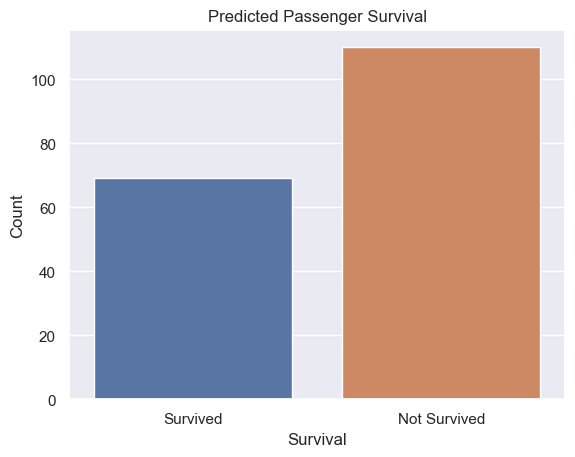

In [18]:
plt.figsize=(8, 6)
sns.barplot(['Survived', 'Not Survived'], [survived_count, not_survived_count])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Predicted Passenger Survival')
plt.show()

In [19]:
survival_by_class = data.groupby('Pclass')['Survived'].mean()

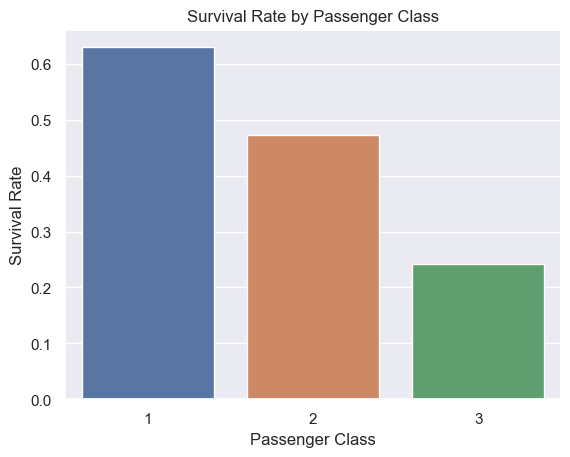

In [20]:
plt.figsize=(8, 6)
sns.barplot(survival_by_class.index, survival_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

In [21]:
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()

**Define the hyperparaters and their range to be tuned for each classifier**

In [22]:
rf_param_grid = {'n_estimators': [100, 200, 300],
                 'min_samples_split': [2, 4, 5],
                'max_features': ['sqrt', 'log2']}

knn_param_grid = {'n_neighbors': [2, 5, 7],
                 'weights': ['uniform', 'distance'],
                 'p': [2,1]}

svm_param_grid = {'C': [0.1, 1, 10],
                 'kernel': ['linear', 'poly', 'rbf'],
                 'degree': [1, 2]}

**Perform hyperparameter tuning and evaluation for each model**

In [23]:
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, scoring='accuracy', cv=5)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [24]:
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, scoring='accuracy', cv=5)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 7], 'p': [2, 1],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [25]:
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, scoring='accuracy', cv=5)
svm_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 2],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

**select the best hyperparameters**

In [26]:
best_rf_model = rf_grid_search.best_estimator_
best_knn_model = knn_grid_search.best_estimator_
best_svm_model = svm_grid_search.best_estimator_

**test the model**

In [27]:
rf_prediction = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_prediction)

In [28]:
knn_prediction = best_knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_prediction)

In [29]:
svm_prediction = best_svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_prediction)

**DataFrame for result**

In [36]:
result_classifier = pd.DataFrame({'model': ['Random Forest', 'KNN', 'SVM'], 
                                 'Accuracy': [rf_accuracy, knn_accuracy, svm_accuracy]})

In [47]:
result_classifier

,model,Accuracy
0,Random Forest,0.837989
1,KNN,0.692737
2,SVM,0.782123


# REPORT

In [49]:
#Build a strong classification model to predict whether the passenger survives or not
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_test, y_pred)

0.8044692737430168

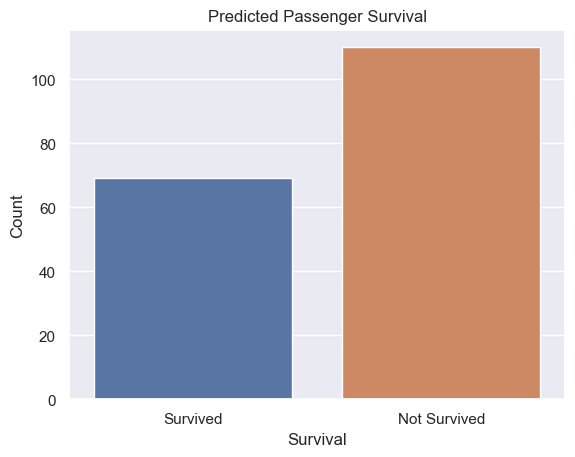

In [50]:
#Survived passenger and not survived passerger
plt.figsize=(8, 6)
sns.barplot(['Survived', 'Not Survived'], [survived_count, not_survived_count])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Predicted Passenger Survival')
plt.show()

In [51]:
#The evaluation metrics of various classification algorithms
result_classifier = pd.DataFrame({'model': ['Random Forest', 'KNN', 'SVM'], 
                                 'Accuracy': [rf_accuracy, knn_accuracy, svm_accuracy]})
ax=result_classifier

,model,Accuracy
0,Random Forest,0.837989
1,KNN,0.692737
2,SVM,0.782123


<Figure size 100x100 with 0 Axes>

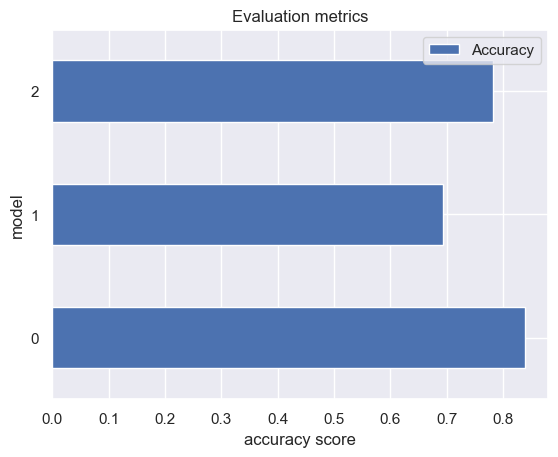

In [61]:
plt.figure(figsize=(1,1))
ax.plot.barh()
plt.xlabel('accuracy score')
plt.ylabel('model')
plt.title('Evaluation metrics')
plt.show()